In [1]:
import matplotlib.pyplot as plt

In [3]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import os

# Set working directory (from notebook/ go up one level and into Data/)
os.chdir("../Data")
print("Current Working Directory:", os.getcwd())

# Load dataset
df = pd.read_csv("BankChurners.csv")
df.head()

Current Working Directory: /Users/teo/Desktop/recommend-ecommerce/Data


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


---
## [1] Scenario Background: Why Customer Churn Matters in E-commerce
---

### Importance of Churn Analysis
- Acquiring a new customer costs **5–7 times more** than retaining an existing one.  
- Rising churn rates can significantly **reduce profitability**.  
- Identifying customers likely to churn enables **personalized marketing** and **targeted retention strategies**.  

### Scenario
You are a data scientist at an e-commerce company.  
Recently, the management team noticed a sharp increase in customer churn.  
They asked the analytics team to address the following questions:

1. What are the key characteristics of customers who churn?  
2. Can we build a predictive model to identify churn risk?  
3. What product recommendation strategies could help reduce churn?  

### Analytical Objectives
- Define the behavioral traits of churned customers.  
- Build a churn prediction model to identify at-risk customers.  
- Propose actionable retention strategies to reduce churn.  
- Investigate which product recommendations are most effective in preventing churn.  

---

---

## [2] Analytical Scenario: Defining and Assessing Customer Churn in E-commerce
---

### What is Customer Churn?  
Customer churn refers to the state where a shopper **stops purchasing products or becomes inactive on the platform for a certain period of time**.  
In e-commerce, churn is typically defined by:  

- No purchases within a set time window (e.g., 3 or 6 months)  
- Account deactivation or membership cancellation  
- Long-term inactivity such as abandoned carts or wishlists  

---

### Churn Definition in This Dataset  
> The **BankChurners.csv** dataset contains a column called `Attrition_Flag`.  

- `"Attrited Customer"` → Churned customer  
- `"Existing Customer"` → Retained customer  

We will use the `Attrition_Flag` column as the target variable for a **binary classification problem** to predict churn.  

---

### Analytical Objectives Summary  

| Step | Goal |
|------|------|
| 1️⃣ | Identify churn rate and customer characteristics |
| 2️⃣ | Prepare and preprocess data for churn prediction |
| 3️⃣ | Build classification models to predict churn |
| 4️⃣ | Derive retention strategies and product recommendation approaches from model insights |

---

In [4]:
import pandas as pd

# Check distribution of churn vs retained customers
df["Attrition_Flag"].value_counts(normalize=True).map("{:.2%}".format)

Attrition_Flag
Existing Customer    83.93%
Attrited Customer    16.07%
Name: proportion, dtype: object

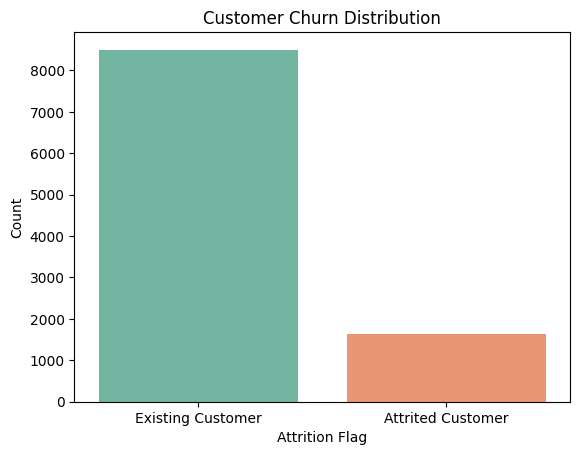

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize churn distribution
sns.countplot(data=df, x="Attrition_Flag", palette="Set2")
plt.title("Customer Churn Distribution")
plt.xlabel("Attrition Flag")
plt.ylabel("Count")
plt.show()

- Use `Attrition_Flag` as the target variable for churn  
- About **16%** of all customers are identified as churned  
- Establish the foundation for analyzing churn characteristics and building a predictive model  

---

---
## [3] Data EDA and Insight Extraction
---

### Purpose
- Identify **differences between churned and retained customers**  
- Select **meaningful features** for building a predictive model  
- Establish the foundation for **targeted marketing strategies**  

### Key Hypotheses and Checks
1. How does the **income level** differ for churned customers?  
2. Do **total transaction count** or **account balance** influence churn?  
3. Are churned customers concentrated in certain **card types** or **customer segments**?  

### Data Preprocessing
- Remove irrelevant columns  
- Convert `Attrition_Flag` into a **binary variable** (`1 = Churned Customer`)  